# Giriş

Kullanılan veriseti 2020 yılında 319795 kişiden toplanan verilerden oluşmaktadır. Kalp Hastalığını neyin etkilediğini gözlemlemek için toplanmıştır. </br>
<font color ="blue">
İçerik:
    </font>

1. [Veriyi Yükleme ve Veriyi Okuma](#1)
2. [Değişkenler](#2)
3. [Kategorik Değişkenler](#3)
4. [Nümerik Değişkenler](#4)
5. [Keşifsel Veri Analizi](#5)
6. [Aykırı Değer Tespiti](#6)
7. [Değişkenler Arasındaki İlişkiler](#7)
8. [Kategorik Değişkenleri Sınıflandırarak Sayısal Değişkenlere Dönüştürme](#8) 
9. [Train ve Test Setleri Oluşturulup Dengesizliği Giderme ](#9) 
10. [Gözetimli Öğrenme Modelleri](#10) 
11. [Gözetimsiz Öğrenme Modelleri](#11) 
12. [En İyi Modeli Optimize Etme](#12) 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [65]:
import warnings
warnings.filterwarnings("ignore")

<a id ="1"> </a>
# 1. Veriyi Yükleme ve Veriyi Okuma


In [2]:
data = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv") #verisetini data değişkenine yüklüyoruz
df=data.copy() #veri setinin kopyasını alıp orijinal veriyi elimizde tutmak için
df.head()#verisetinin ilk 5 gözlemini görmek için

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
def check_df(dataframe): 
    #check_df adında bir fonksiyon tanımlıyoruz. bu fonksiyon 
    #ile verisetinin kısaca özetini göreceğiz. Bu fonksiyon başka 
    #verisetleri yüklediğimizde veya değiştirdiğimiz verisetinin özetini hızlıca görebilmek için
    
    print("---------- Shape ----------")     
    print(dataframe.shape) #veriseti kaç satır ve sütundan oluştuğunu görmek için
    
    print("---------- Dtypes ----------")
    print(dataframe.dtypes)#verisetindeki  değişkenlerin tipini görmek için
    
    print("---------- Null ----------")
    print(dataframe.isnull().sum())#verisetindeki boş değerlerin toplamını görmek için
    
    print("---------- Nunique ----------") #verisetindeki değişkenlerin eşsiz değer sayısını görmek için
    print(dataframe.nunique())
    
    print("---------- Null ----------") #verisetindeki sayısal değişkenlerin tanımlayıcı istatistikleri için
    print(dataframe.describe())  

In [4]:
check_df(df)

---------- Shape ----------
(319795, 18)
---------- Dtypes ----------
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object
---------- Null ----------
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer 

<a id ="2"> </a>
# 2. Değişkenler
1. HeartDisease : Kalp Hastalığı - (No,Yes)
2. BMI : Vücut Kitle İndeksi - Nümerik(sürekli)
3. Smoking : Sigara İçme - (No,Yes)
4. AlcoholDrinking : Alkol Kullanımı - (No,Yes)
5. Stroke : İnme - (No,Yes)
6. PhysicalHealth : Fiziksel Sağlık - Nümerik(kesikli)
7. MentalHealth : Zihinsel Sağlık Nümerik(kesikli)
8. DiffWalking : Yürüme Zorluğu - (No,Yes)
9. Sex : Cinsiyet - (Female , Male)
10. AgeCategory : Yaş Kategorisi - ('55-59' , '80 or older' , '65-69','75-79' , '40-44','70-74' , '60-64' , '50-54' , '45-49' , '18-24' , '35-39' , '30-34' , '25-29')
11. Race : Irk - ('White', 'Black', 'Asian', 'American Indian/Alaskan Native','Other', 'Hispanic')
12. Diabetic : Diyabet Hastası - ('Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)')
13. PhysicalActivity : Fiziksel Aktivite - (No,Yes)
14. GenHealth : Genel Sağlık - ('Very good', 'Fair', 'Good', 'Poor', 'Excellent')
15. SleepTime : Uyku Süresi - Nümerik(kesikli)
16. Asthma : Astım - (No,Yes) 
17. KidneyDisease : Böbrek Hastalığı - (No,Yes)
18. SkinCancer : Cilt Kanseri - (No,Yes)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<a id ="3"> </a>
# 3. Kategorik Değişkenler

In [3]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]] #kategorik değişkenler
cat_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [7]:
num_but_cat =[col for col in df.columns if df[col].nunique()<10 and df[col].dtypes in ["int64","float64"]]
num_but_cat #10dan küçük sınıfı olan sayısal gözüken kategorik değişkenler

[]

In [8]:
cat_but_num =[col for col in df.columns if df[col].nunique()>20 and str(df[col].dtypes) in ["category","object"]]
cat_but_num #20den fazla sınıfı olan var mı yok mu diye bakıyoruz. Kategorik gözüküp sayısal olabilir

[]

In [10]:
def bar_plot(variable):  #bu fonksiyon ile kategorik değişkenlerin grafiğini bar plot ile görselleştiriyoruz
    var = df[variable]   
    varValue=var.value_counts()    
    plt.figure(figsize=(7,5))
    colors =plt.cm.Paired(np.linspace(0, 1, len(varValue)))
    plt.bar(varValue.index,varValue.values,color=colors)
    plt.xticks(varValue.index,varValue.index.values,rotation=90,size=10)
    plt.ylabel("Frequency") 
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

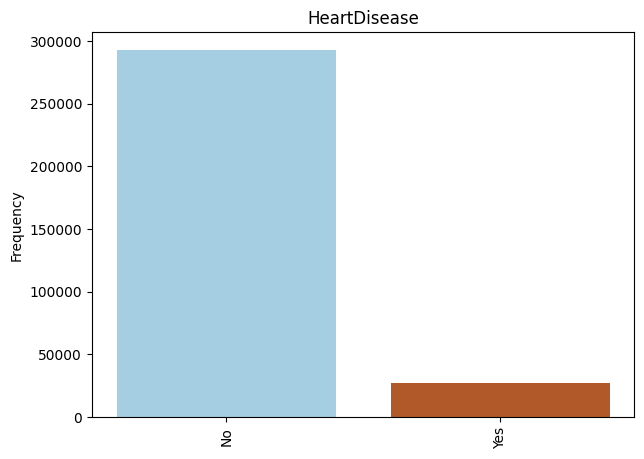

HeartDisease: 
 HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


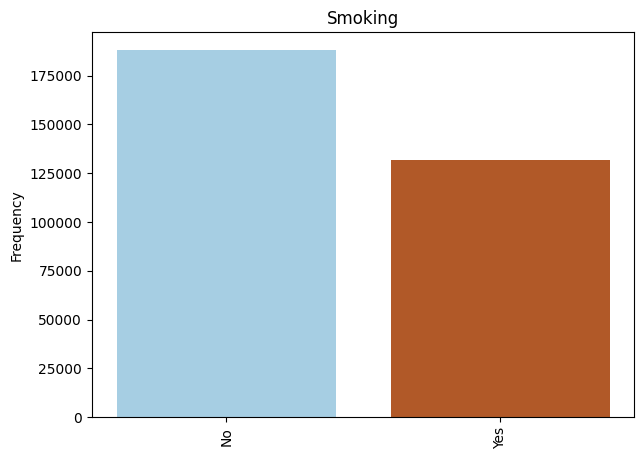

Smoking: 
 Smoking
No     187887
Yes    131908
Name: count, dtype: int64


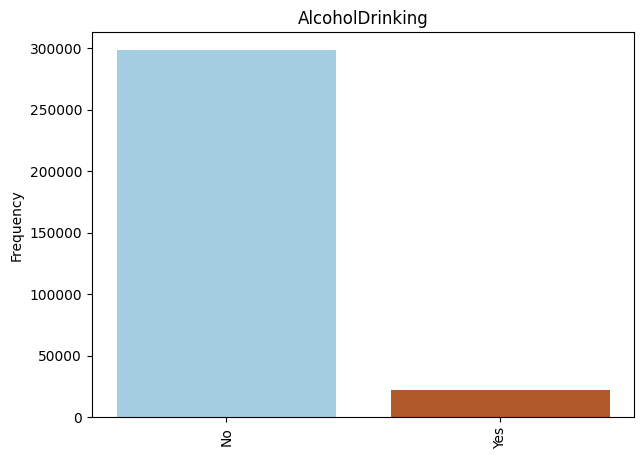

AlcoholDrinking: 
 AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64


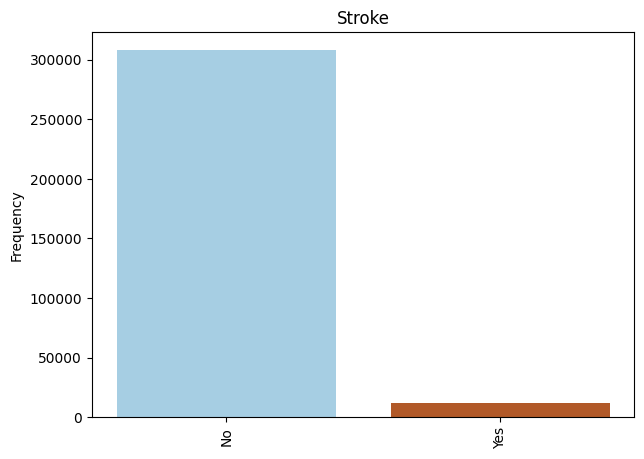

Stroke: 
 Stroke
No     307726
Yes     12069
Name: count, dtype: int64


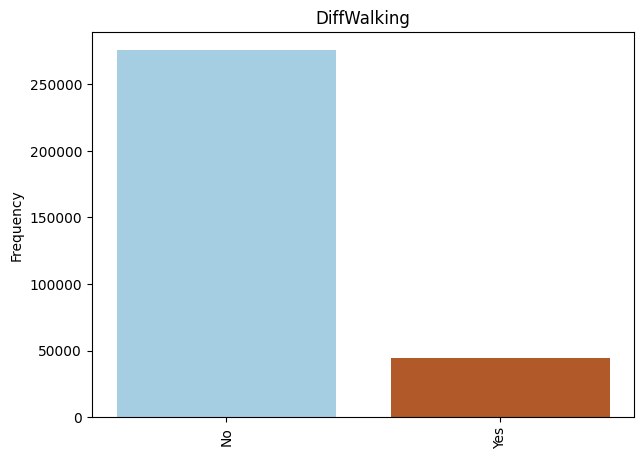

DiffWalking: 
 DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64


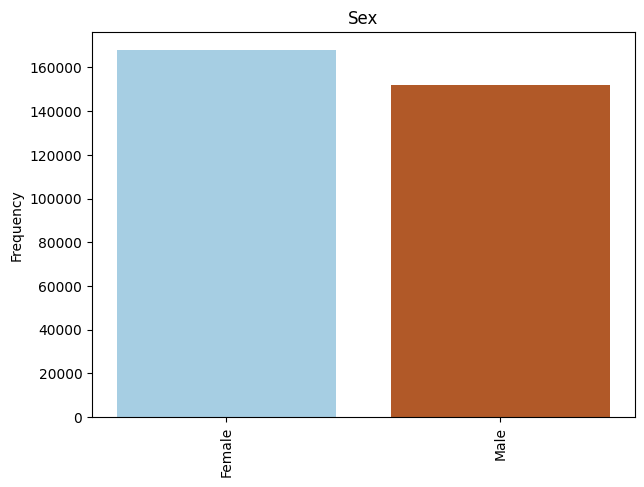

Sex: 
 Sex
Female    167805
Male      151990
Name: count, dtype: int64


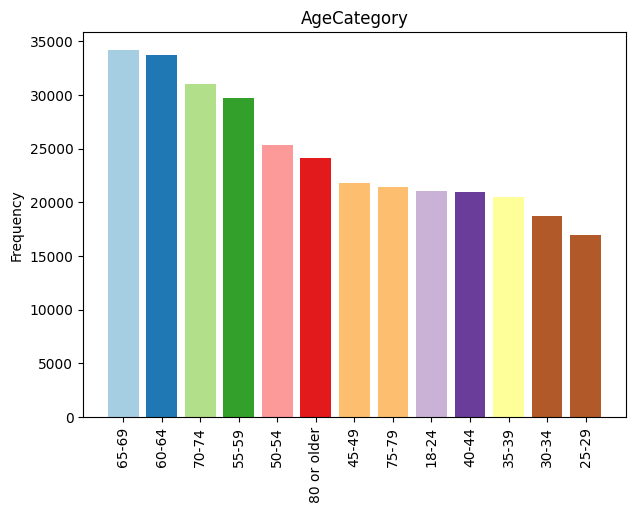

AgeCategory: 
 AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64


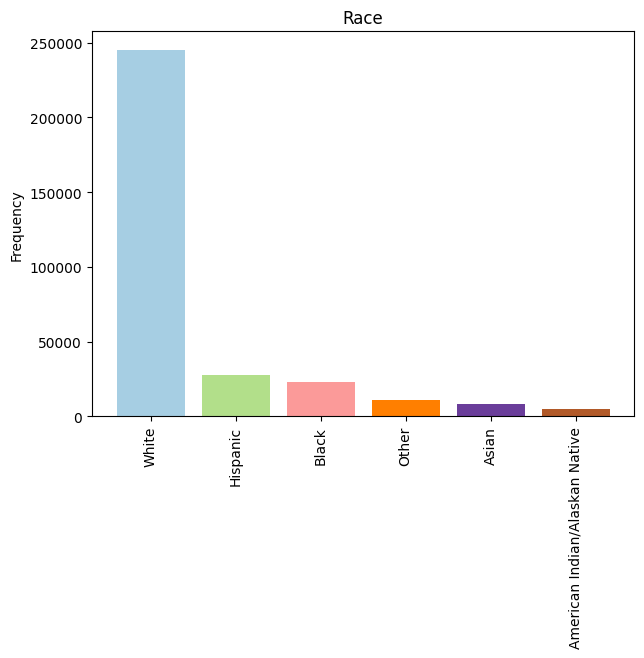

Race: 
 Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64


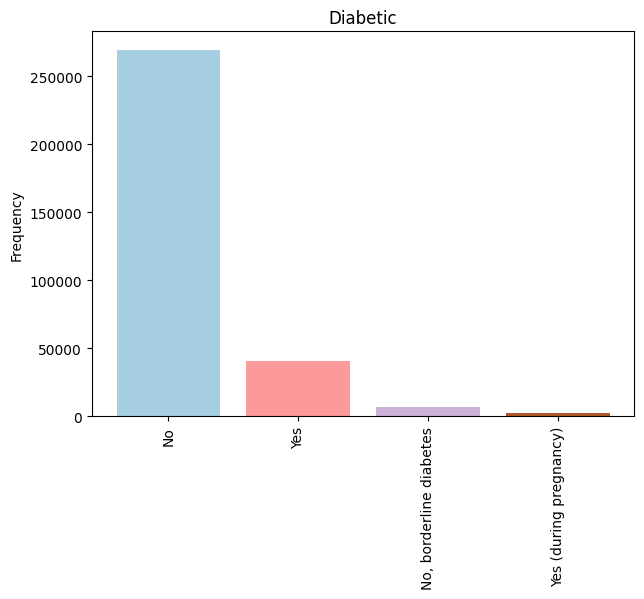

Diabetic: 
 Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64


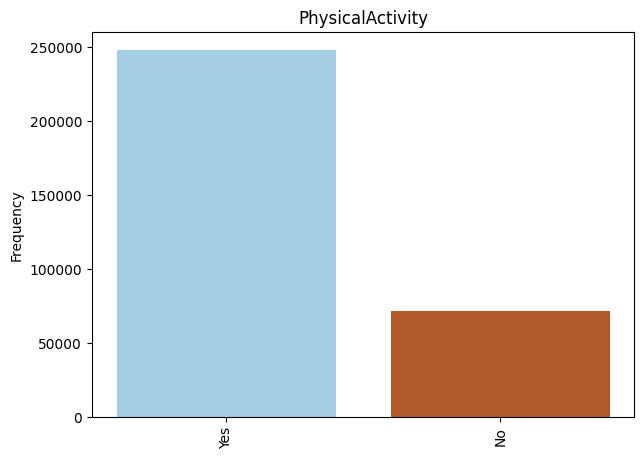

PhysicalActivity: 
 PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64


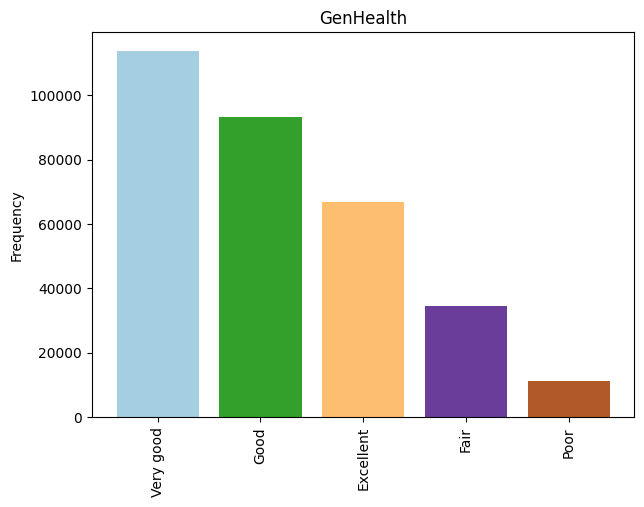

GenHealth: 
 GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: count, dtype: int64


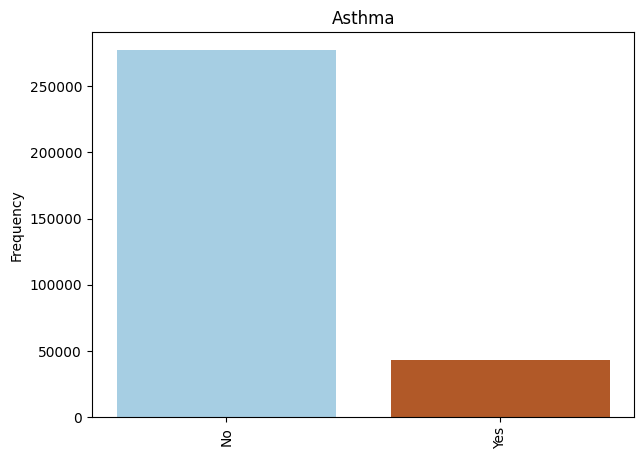

Asthma: 
 Asthma
No     276923
Yes     42872
Name: count, dtype: int64


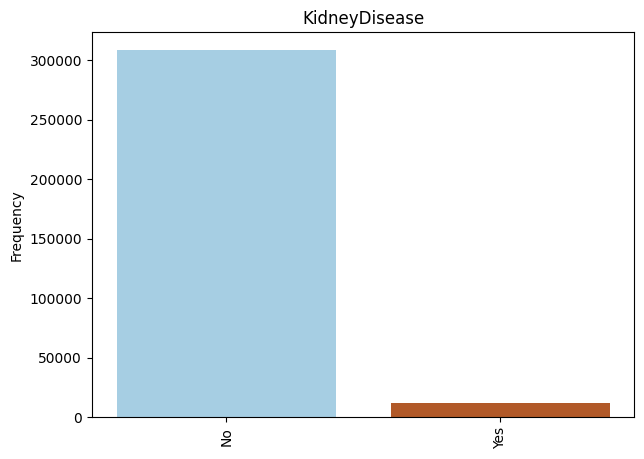

KidneyDisease: 
 KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64


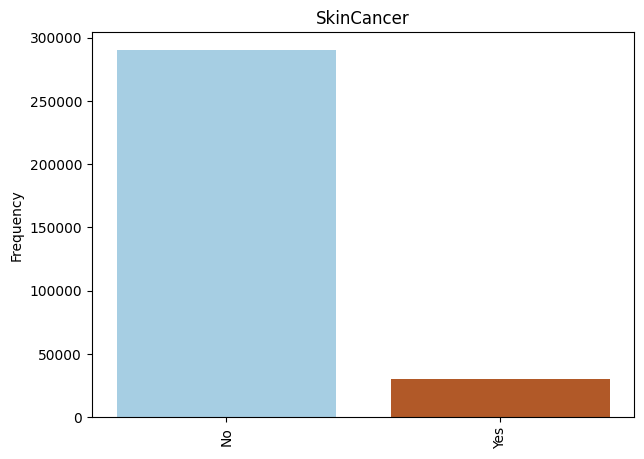

SkinCancer: 
 SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64


In [11]:
for a in cat_cols:
    bar_plot(a)

In [55]:
for cols in cat_cols: #basit bir fonksiyon ile kategorik değişkenlerin frekanslarının dağılımı
    print(f"\n{cols} frekans dağılımı:\n")
    print(df[cols].value_counts())


HeartDisease frekans dağılımı:

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

Smoking frekans dağılımı:

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

AlcoholDrinking frekans dağılımı:

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

Stroke frekans dağılımı:

Stroke
No     307726
Yes     12069
Name: count, dtype: int64

DiffWalking frekans dağılımı:

DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64

Sex frekans dağılımı:

Sex
Female    167805
Male      151990
Name: count, dtype: int64

AgeCategory frekans dağılımı:

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

Race frekans dağılımı:

Race
White                             245212
Hispanic        

<a id ="4"> </a>
# 4. Sayısal Değişkenler

In [4]:
num_cols = [col for col in df.columns if str(df[col].dtypes) in ["int64","float64"]] #sayısal değişkenler
num_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [13]:
def plot_hist(variable): #nümerik değişkenleri histogram grafiği ile görselleştiriyoruz
    plt.figure(figsize=(7,4))
    colors = plt.cm.viridis(np.linspace(0, 1, len(df[variable].unique())))
    plt.hist(df[variable],bins=len(df[variable].unique()),color=colors[0], edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

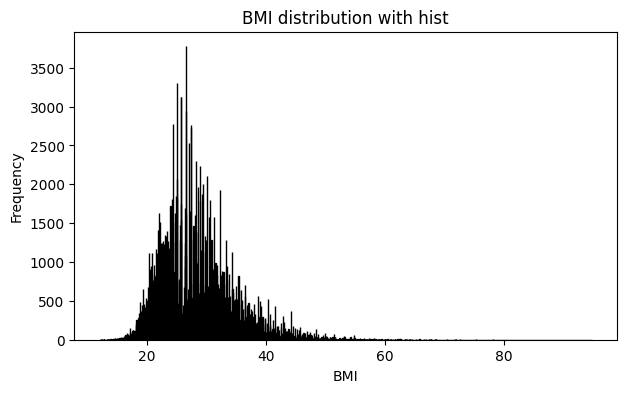

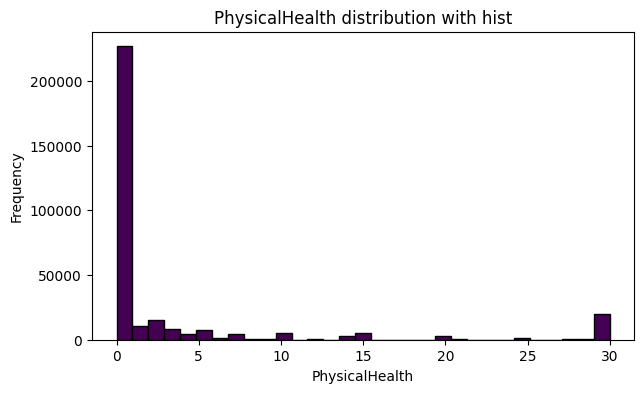

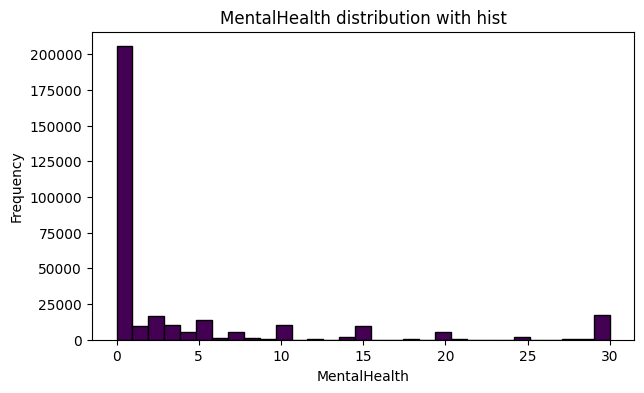

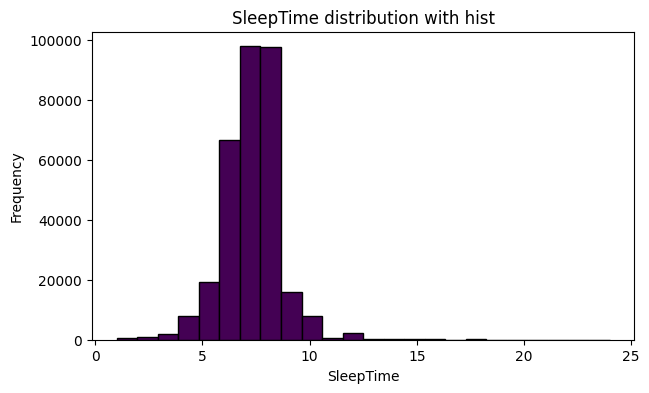

In [14]:
for b in num_cols:
    plot_hist(b)

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


<a id="5"> </a>
# Keşifsel Veri Analizi (EDA)
* Sex - BMI
* HeartDisease - BMI
* HeartDisease - PhysicalHealth
* HeartDisease - MentalHealth
* HeartDisease - SleepTime

In [17]:
df.groupby(["Sex"],as_index=False).agg({"BMI":"mean"}).sort_values("BMI",ascending=False)

,Sex,BMI
1,Male,28.505317
0,Female,28.162436


In [18]:
df.groupby(["HeartDisease"],as_index=False).agg({"BMI":"mean"}).sort_values("BMI",ascending=False)

,HeartDisease,BMI
1,Yes,29.401592
0,No,28.224658


In [24]:
grouped_df3 = df.groupby(["Sex","HeartDisease"],as_index=False).agg({"BMI":"mean"}).sort_values("BMI",ascending=False)
grouped_df3

,Sex,HeartDisease,BMI
3,Male,Yes,29.419411
1,Female,Yes,29.375993
2,Male,No,28.396724
0,Female,No,28.075363


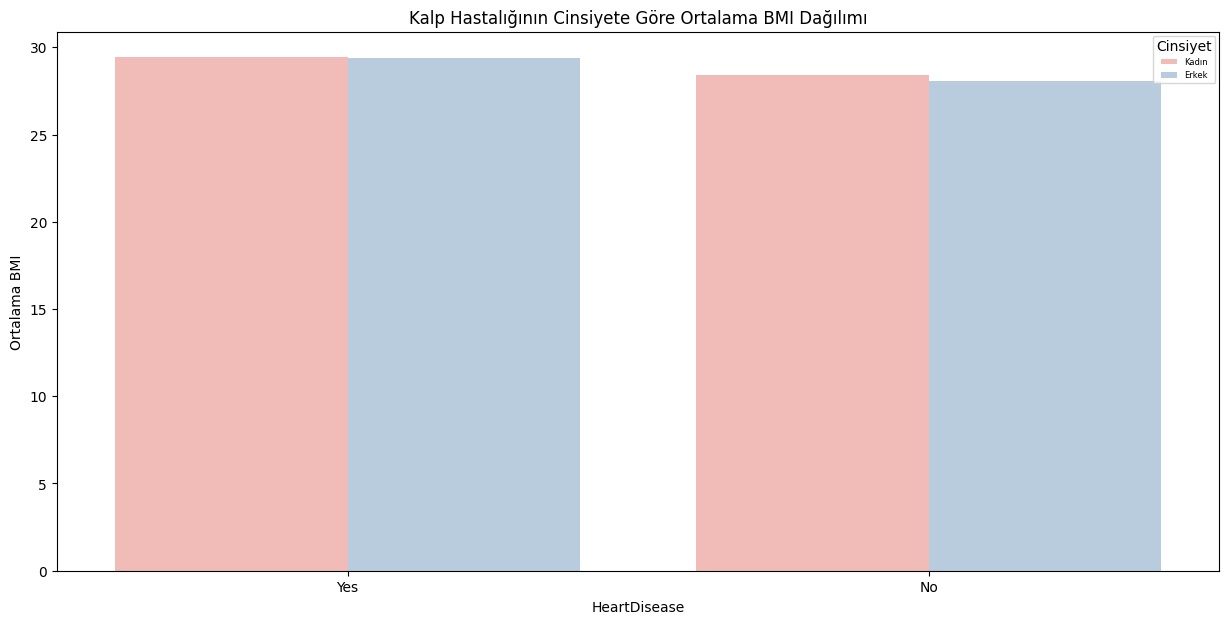

In [27]:
plt.figure(figsize=(15, 7))
bar = sns.barplot(x='HeartDisease', y='BMI', hue='Sex', data=grouped_df3, palette="Pastel1")
plt.title('Kalp Hastalığının Cinsiyete Göre Ortalama BMI Dağılımı')
plt.ylabel('Ortalama BMI')
handles, labels = bar.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Kadın', 'Erkek'],title="Cinsiyet",fontsize=6,loc='upper right')
plt.show()

In [21]:
df.groupby(["HeartDisease"],as_index=False).agg({"PhysicalHealth":"mean"}).sort_values("PhysicalHealth",ascending=False)

,HeartDisease,PhysicalHealth
1,Yes,7.808242
0,No,2.956416


In [22]:
df.groupby(["HeartDisease"],as_index=False).agg({"MentalHealth":"mean"}).sort_values("MentalHealth",ascending=False)

,HeartDisease,MentalHealth
1,Yes,4.641764
0,No,3.828778


In [23]:
df.groupby(["HeartDisease"],as_index=False).agg({"SleepTime":"mean"}).sort_values("SleepTime",ascending=False)

,HeartDisease,SleepTime
1,Yes,7.136156
0,No,7.093416


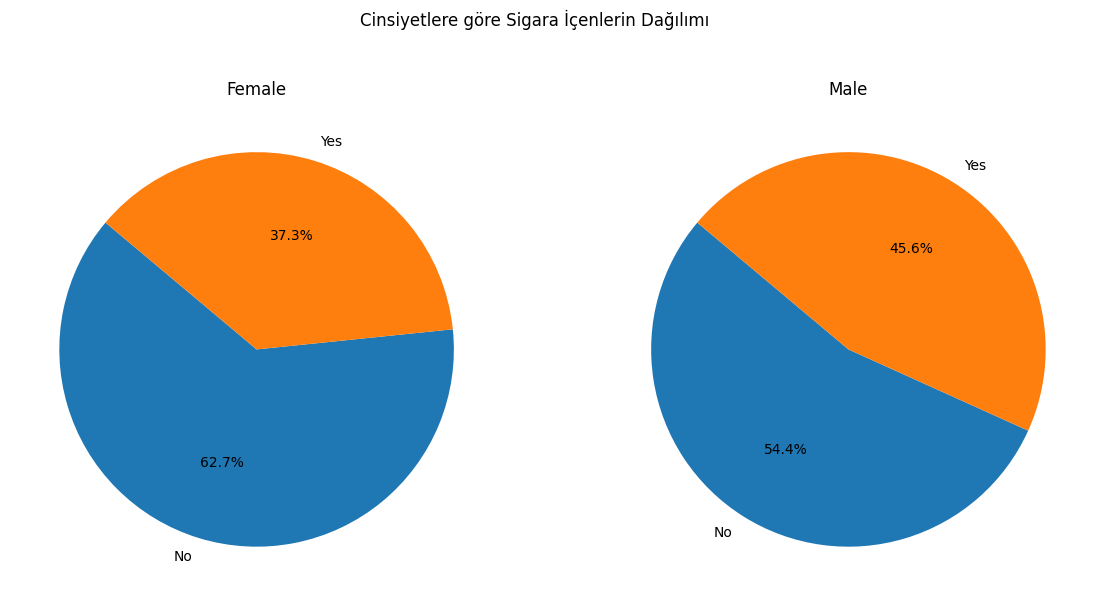

In [28]:
grouped_dfs = df.groupby(['Sex', 'Smoking']).size().unstack(fill_value=0)

fig, axs = plt.subplots(1, len(grouped_dfs.index), figsize=(14, 7))

# Her cinsiyet için pasta grafiği oluşturma
for ax, sex in zip(axs, grouped_dfs.index):
    sizes = grouped_dfs.loc[sex]
    labels = sizes.index
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{sex}')

plt.suptitle('Cinsiyetlere göre Sigara İçenlerin Dağılımı')
plt.show()

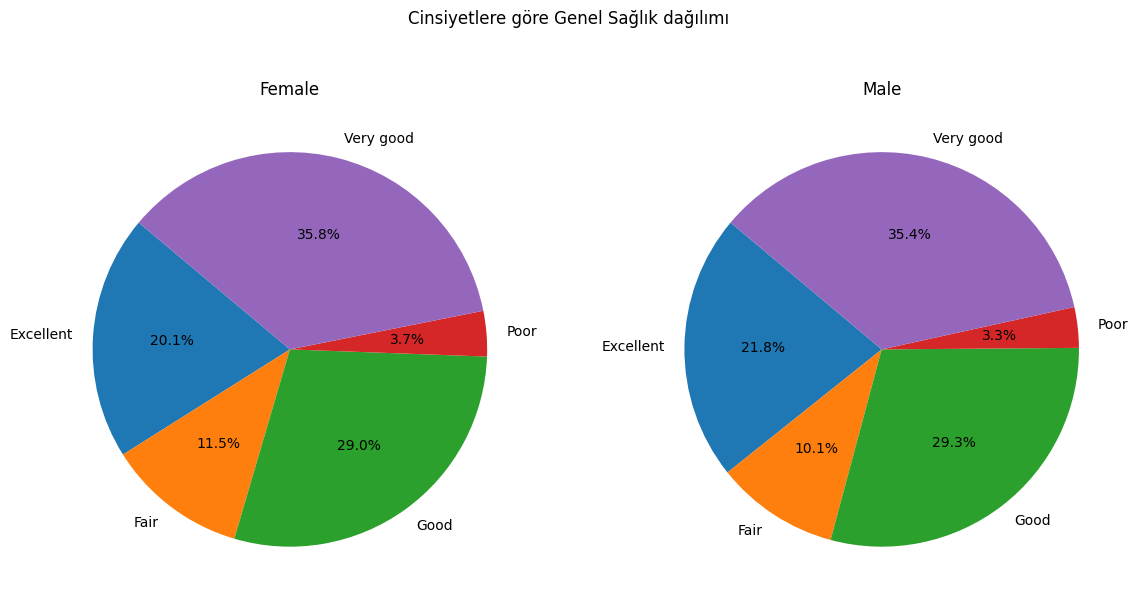

In [29]:
grouped_dfs1 = df.groupby(['Sex', 'GenHealth']).size().unstack(fill_value=0)

fig, axs = plt.subplots(1, len(grouped_dfs1.index), figsize=(14, 7))

# Her cinsiyet için pasta grafiği oluşturma
for ax, sex in zip(axs, grouped_dfs1.index):
    sizes = grouped_dfs1.loc[sex]
    labels = sizes.index
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{sex}')

plt.suptitle('Cinsiyetlere göre Genel Sağlık dağılımı')
plt.show()

<a id="6"> </a>
# Aykırı Değer Tespiti

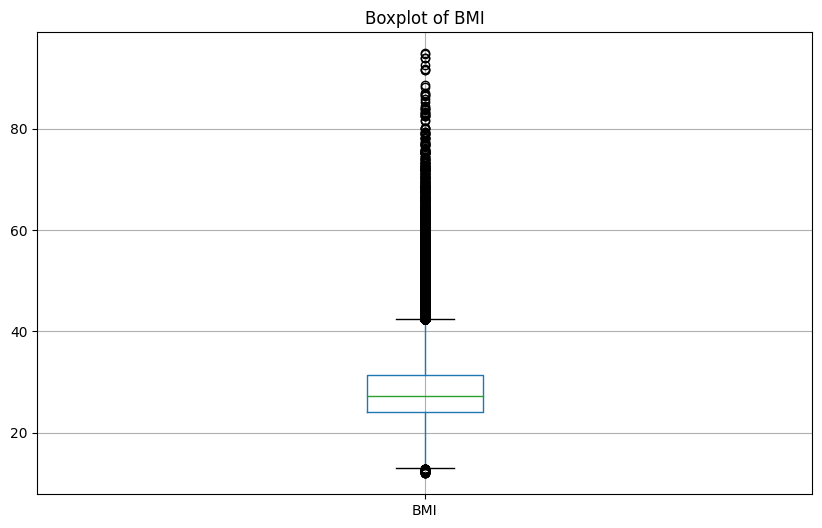

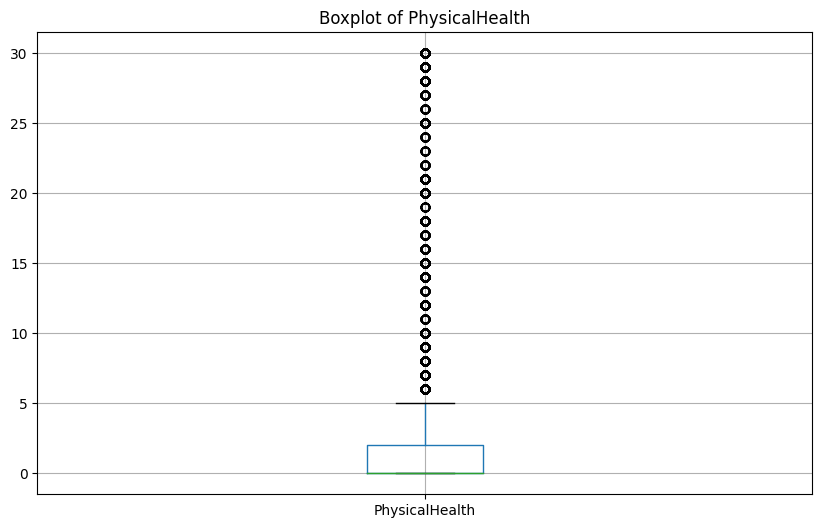

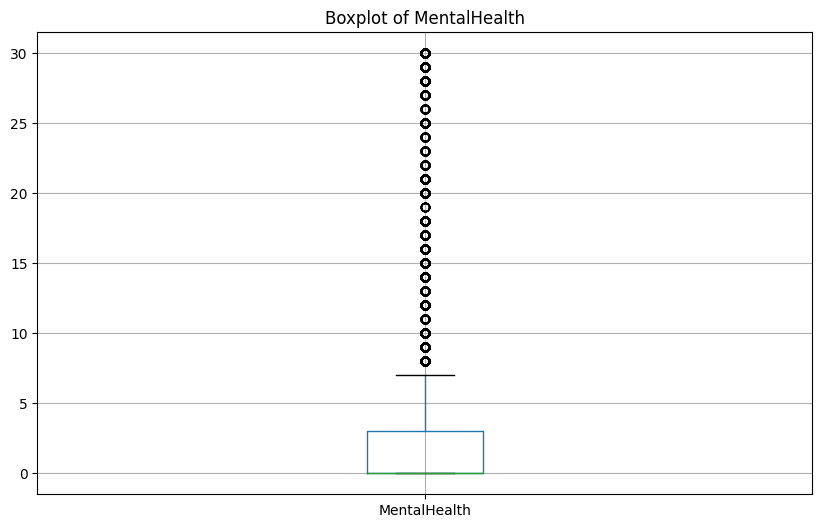

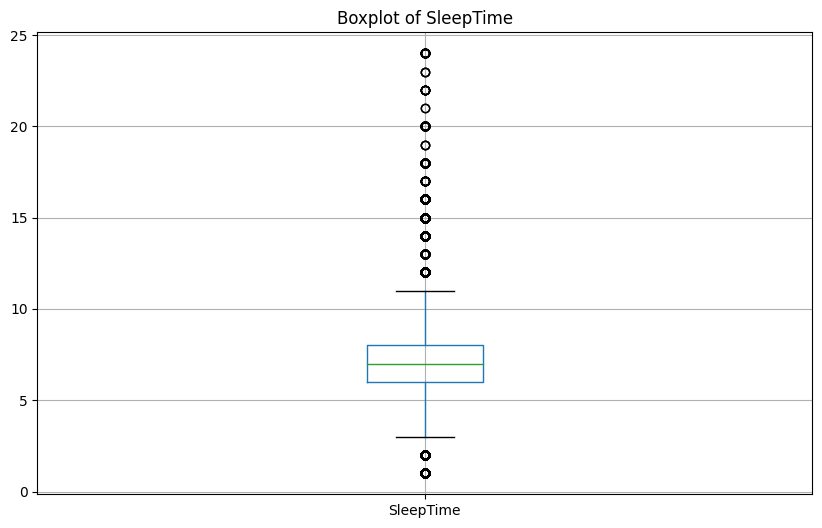

In [42]:
for col in num_cols: # Aykırı Değer olup olmadığını ilk önce boxplot ile inceleyelim.
    plt.figure(figsize=(10, 6))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

**Boxplot'ları incelediğimizde 4 değişkende de aykırı gözlemler olduğunu görebiliyoruz.**

In [6]:
outlier_list = [] #IQR ile fonksiyon oluşturarak aykırı gözlem tespiti. Boş liste oluşturup içine aykırı gözlemleri atıyoruz.
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outlier_list.append(df[condition])

# Aykırı değerleri birleştirmek için
outliers = pd.concat(outlier_list).drop_duplicates().reset_index(drop=True)
outliers

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,45.35,No,No,No,30.0,0.0,Yes,Male,70-74,White,Yes,No,Good,8.0,No,No,No
1,No,46.52,Yes,No,No,30.0,0.0,No,Male,65-69,White,Yes,No,Poor,8.0,Yes,No,No
2,No,44.29,No,No,No,30.0,10.0,Yes,Female,70-74,White,No,No,Fair,7.0,No,No,Yes
3,No,58.54,No,No,No,30.0,0.0,Yes,Male,65-69,Other,"No, borderline diabetes",Yes,Poor,3.0,Yes,No,No
4,No,45.42,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Very good,7.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88648,No,23.03,Yes,Yes,No,0.0,0.0,No,Female,35-39,Hispanic,No,No,Excellent,12.0,No,No,No
88649,No,29.16,No,No,No,1.0,0.0,Yes,Male,40-44,Hispanic,No,No,Excellent,12.0,No,No,No
88650,No,33.13,No,No,No,0.0,0.0,No,Male,55-59,Hispanic,No,Yes,Fair,2.0,No,Yes,No
88651,No,24.41,No,Yes,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Good,12.0,No,No,No


**IQR ile tespit ettiğmiz aykırı gözlemleri görüyoruz. Bu aykırı gözlemleri verisetinden çıkarmamız gerekiyor.**

In [7]:
cleaned_df = df.drop(outliers.index) #tespit edilen aykırı gözlemleri çıkarıp cleaned_df veri setine aktarıyoruz.
cleaned_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
88653,No,38.26,Yes,No,No,2.0,0.0,No,Male,60-64,White,"No, borderline diabetes",Yes,Good,8.0,No,No,No
88654,No,38.52,No,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Good,6.0,No,No,No
88655,No,24.39,Yes,No,No,0.0,0.0,No,Male,18-24,White,No,Yes,Good,5.0,Yes,No,No
88656,No,23.30,No,No,No,0.0,0.0,No,Female,60-64,White,No,Yes,Excellent,6.0,No,No,No
88657,No,35.43,No,No,No,1.0,0.0,No,Female,65-69,White,Yes,Yes,Very good,9.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [57]:
cleaned_df.describe().T #aykırı gözlemleri çıkardıktan sonra sayısal değişkenlerin istatistikleri

,count,mean,std,min,25%,50%,75%,max
BMI,231142.0,28.394963,6.355200,12.02,24.11,27.37,31.55,94.85
PhysicalHealth,231142.0,3.333881,7.917343,0.00,0.00,0.00,2.00,30.00
MentalHealth,231142.0,3.891171,7.952993,0.00,0.00,0.00,3.00,30.00
SleepTime,231142.0,7.095785,1.417055,1.00,6.00,7.00,8.00,24.00


<a id="7"> </a>
# Değişkenler Arasındaki İlişkiler

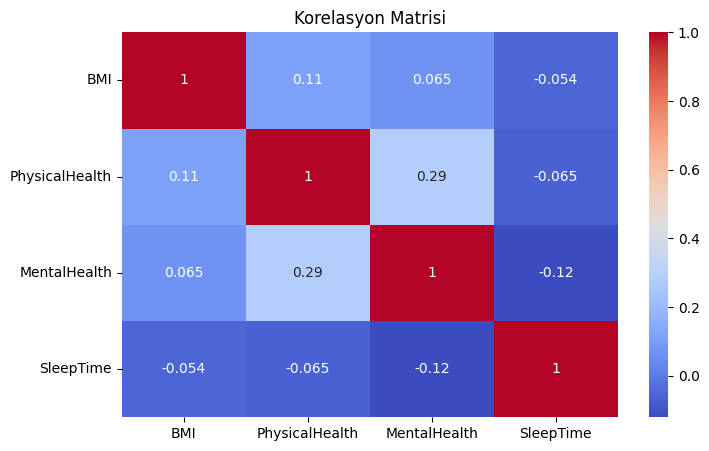

In [62]:
corr_matrix = cleaned_df[num_cols].corr() #Sayısal değişkenlerin korelasyonlarına bakmak için.
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

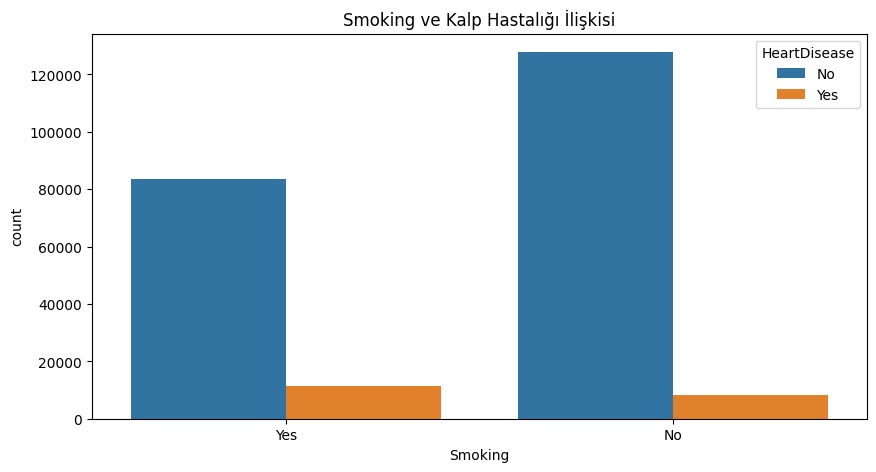

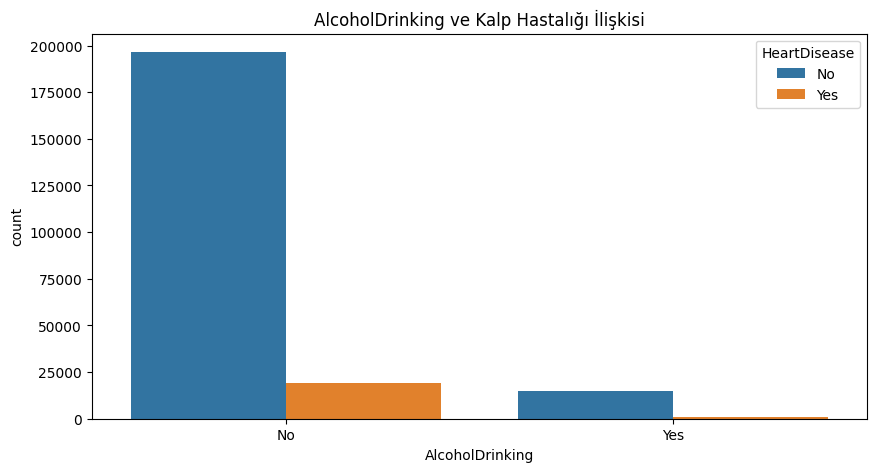

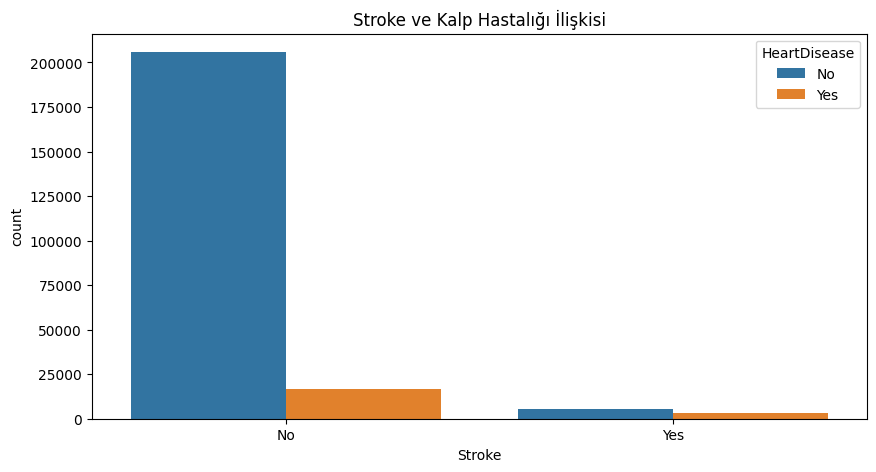

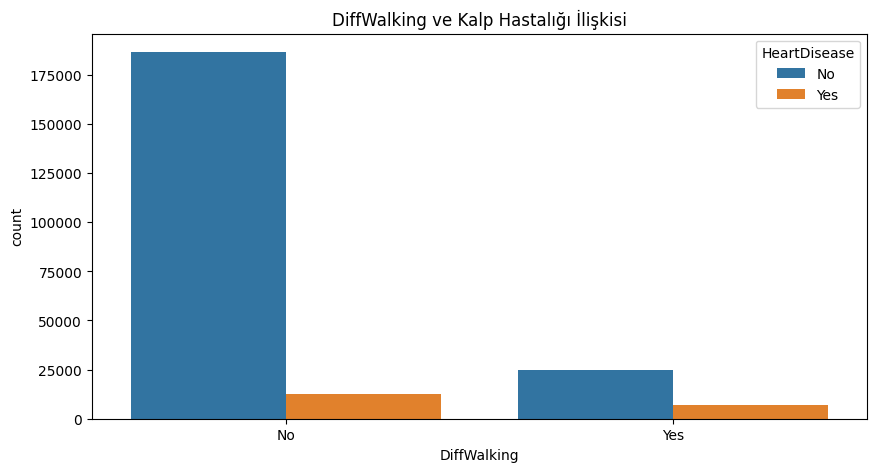

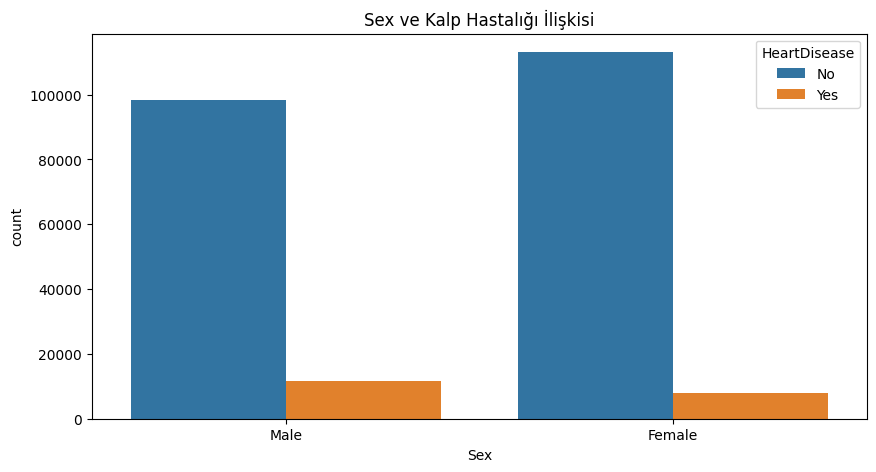

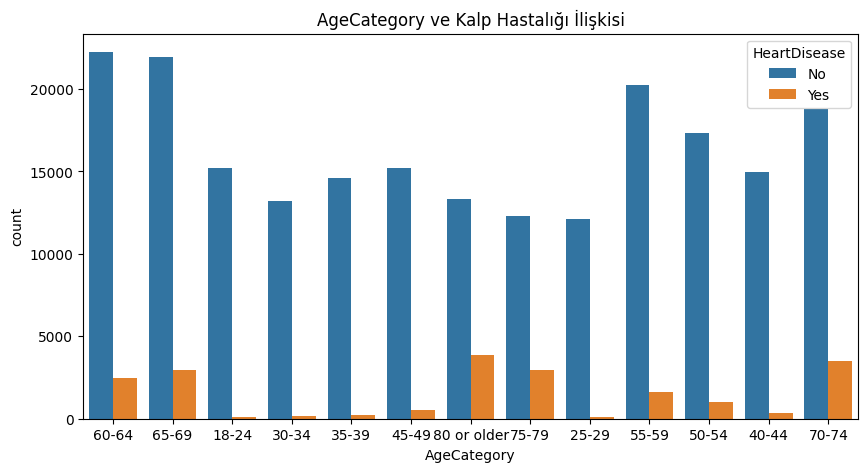

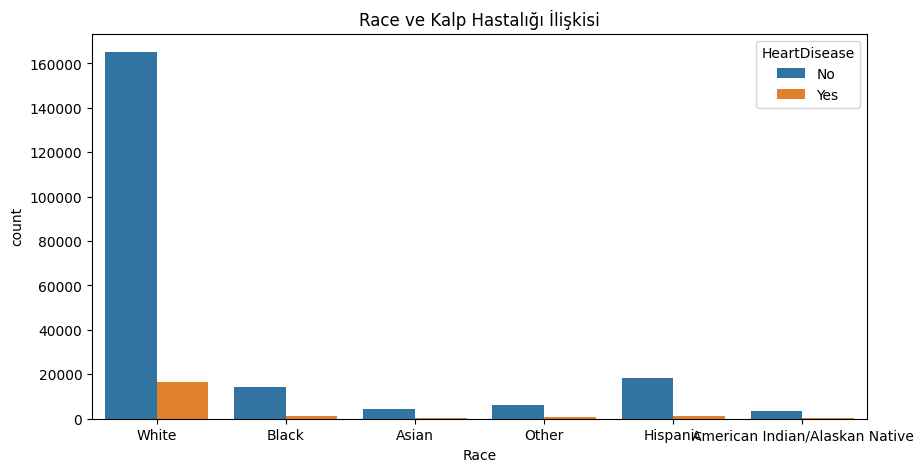

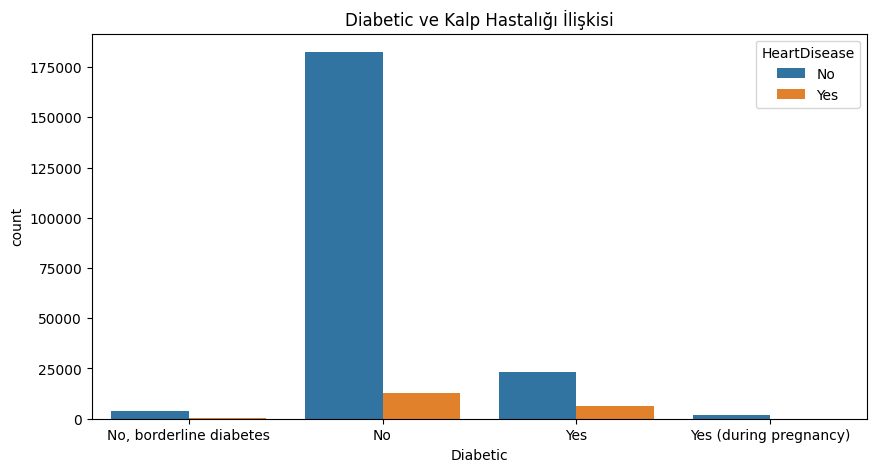

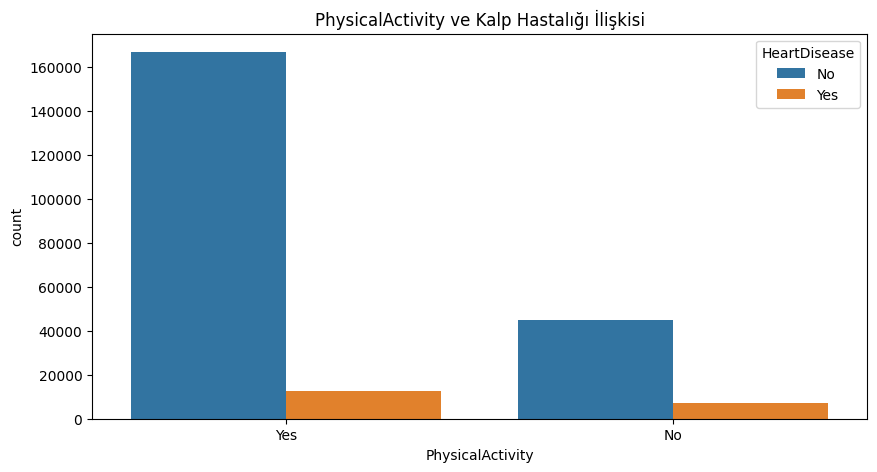

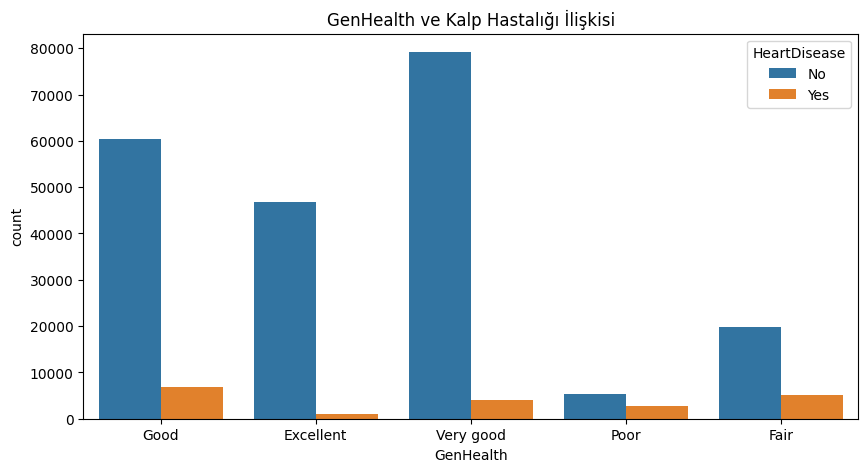

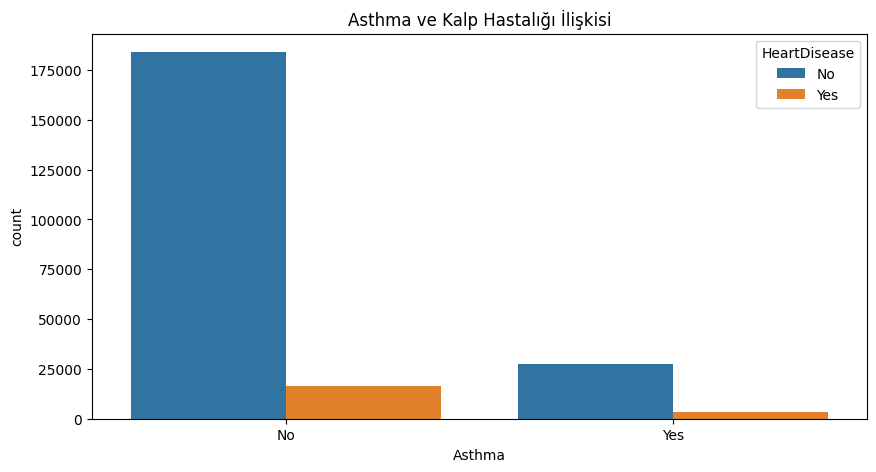

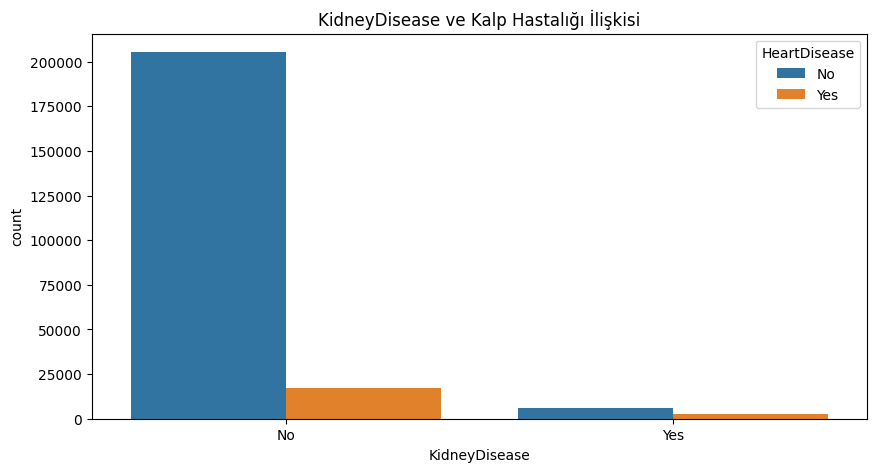

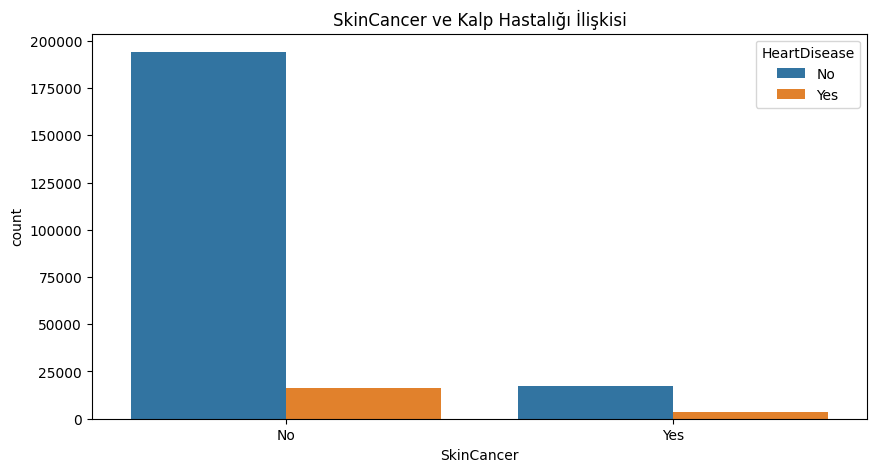

In [71]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='HeartDisease', data=cleaned_df)
    plt.title(f'{col} ve Kalp Hastalığı İlişkisi')
    plt.show()

**İlişkilere baktığımızda çoğu değişkenin dengesizliği gözüküyor. Bu dengesizlikleri ortadan kaldırmalıyız**

<a id="8"> </a>
# Kategorik Değişkenleri Sınıflandırarak Sayısal Değişkenlere Dönüştürme

In [8]:
clean_df =cleaned_df.copy()

In [9]:
clean_df['HeartDisease'] = clean_df['HeartDisease'].map({'No': 0, 'Yes': 1})

In [10]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# 1. İkili kategorik değişkenler için LabelEncoder kullanarak "no" ve "yes" kodlaması
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
                   'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

label_encoders = {}
for col1 in binary_columns:
    le = LabelEncoder()
    clean_df[col1] = le.fit_transform(clean_df[col1])  # "no" -> 0, "yes" -> 1

# 2. İkili kategorik değişken için (Sex) LabelEncoder
clean_df['Sex'] = LabelEncoder().fit_transform(clean_df['Sex'])  # "female" -> 0, "male" -> 1

# 3. Sıralı kategorik değişkenler için OrdinalEncoder (AgeCategory, GenHealth,Diabetic)
ordinal_columns = ['AgeCategory', 'GenHealth','Diabetic']
ordinal_encoder = OrdinalEncoder(categories=[
    ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],  # AgeCategory sırası
    ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],  # GenHealth sırası
    ['No, borderline diabetes', 'No', 'Yes', 'Yes (during pregnancy)'] # Diabetic Sırası
])
clean_df[ordinal_columns] = ordinal_encoder.fit_transform(clean_df[ordinal_columns])



In [11]:
clean_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
88653,0,38.26,1,0,0,2.0,0.0,0,1,8.0,White,0.0,1,2.0,8.0,0,0,0
88654,0,38.52,0,0,0,0.0,0.0,0,1,9.0,White,1.0,1,2.0,6.0,0,0,0
88655,0,24.39,1,0,0,0.0,0.0,0,1,0.0,White,1.0,1,2.0,5.0,1,0,0
88656,0,23.30,0,0,0,0.0,0.0,0,0,8.0,White,1.0,1,4.0,6.0,0,0,0
88657,0,35.43,0,0,0,1.0,0.0,0,0,9.0,White,2.0,1,3.0,9.0,0,0,1


<a id="9"> </a>
# Train ve Test Setleri Oluşturulup Dengesizliği Giderme

In [72]:
from imblearn.over_sampling import SMOTE #smote ile azınlık olan sınıfa yeni örnekler oluşturarak dengesizliği giderir
from sklearn.model_selection import train_test_split


X = clean_df.drop(columns=['HeartDisease'], axis=1) 
y = clean_df['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("SMOTE sonrası veri dağılımı:")
print(y_train_resampled.value_counts())

SMOTE sonrası veri dağılımı:
HeartDisease
0    147893
1    147893
Name: count, dtype: int64


<a id="10"> </a>
# Gözetimli Öğrenme Modelleri

In [99]:
from sklearn.neighbors import KNeighborsClassifier #gerekli kütüphaneleri import ediyoruz.
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix ,roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler() #açıklayıcı değişkenlerin test ve eğitim kümlerini standartlaştırıyoruz
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  
X_test_scaled = scaler.transform(X_test)

In [80]:
model1 = [KNeighborsClassifier(),LogisticRegression(max_iter=1000,class_weight='balanced'), XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)),ExtraTreesClassifier(),RandomForestClassifier(class_weight='balanced')]
#modellerimi listeliyoruz

In [86]:
from sklearn.model_selection import cross_val_score #çaprazlama yaparak modelleri daha iyi hale getiriyoruz.
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# StratifiedKFold ile sınıf dengesini koruyarak k-katlı cross-validation yapıyoruz
skf = StratifiedKFold(n_splits=5)


for mdl in model1:    
    print(f"Model: {mdl.__class__.__name__}")
    y_pred = cross_val_predict(mdl, X_train_resampled_scaled, y_train_resampled, cv=skf, method='predict')
    for scorer_name, scorer in scorers.items():
        scores = cross_val_score(mdl, X_train_resampled_scaled, y_train_resampled, scoring=scorer, cv=skf)
        print(f"{scorer_name.capitalize()} (mean): {np.mean(scores):.4f}")
    
    print("\nClassification Report:\n", classification_report(y_train_resampled, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_train_resampled, y_pred))

    print("--------------------------------------")

#modelleri cross_val ile iyileştirip  for döngüsüyle listeledeğimiz gözetimli öğrenme modellerini uyguluyoruz. scorers ile gerekli olan metrikleri inceleyeceğiz.

Model: KNeighborsClassifier
Accuracy (mean): 0.8445
Precision (mean): 0.8100
Recall (mean): 0.9000
F1 (mean): 0.8523

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84    147893
           1       0.81      0.90      0.85    147893

    accuracy                           0.84    295786
   macro avg       0.85      0.84      0.84    295786
weighted avg       0.85      0.84      0.84    295786

Confusion Matrix:
 [[116683  31210]
 [ 14786 133107]]
--------------------------------------
Model: LogisticRegression
Accuracy (mean): 0.7629
Precision (mean): 0.7495
Recall (mean): 0.7894
F1 (mean): 0.7688

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76    147893
           1       0.75      0.79      0.77    147893

    accuracy                           0.76    295786
   macro avg       0.76      0.76      0.76    295786
weighted avg       0.76   

**Modellerin performanslarını inceledimizde ExtraTreesClassifier ve RandomForestClassifier modelleri daha iyi performans göstermiştir. RandomForestClassifier, accuracy, precision ve f1 skorlarında çok başarılı sonuç göstermiştir. Confusion Matrixleri incelediğimizde de RandomForestClassifier modelinin daha başarılı olduğunu görebiliyoruz.**

<a id="11"> </a>
# Gözetimsiz Öğrenme Modelleri

In [111]:
from sklearn.preprocessing import StandardScaler #Gerekli olan kütüphaneleri import ediyoruz
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV

In [21]:
clean_df = clean_df.drop("Race",axis=1) #Race değişkenini daha iyi sonuç için verisetinden çıkarıyoruz

In [23]:
scaler = StandardScaler() #verileri standartlaştırıyoruz
scaled_df = scaler.fit_transform(clean_df)

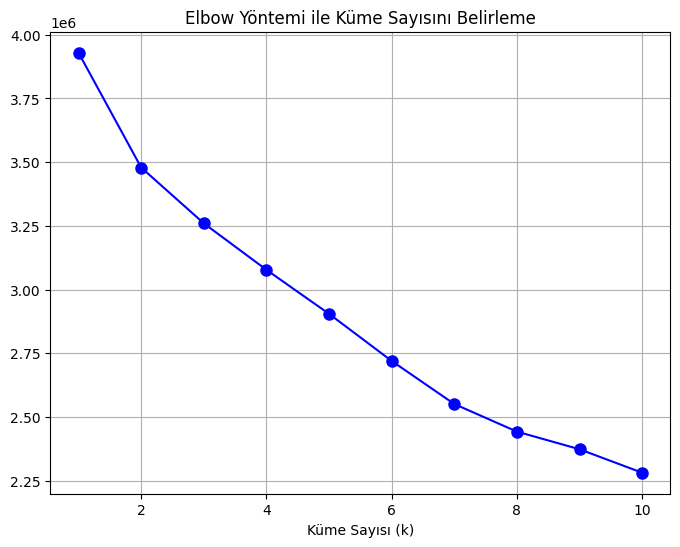

In [26]:
elbow = [] #elbow yöntemi ile optimal k sayısını bulalım
k_values = range(1, 11) 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    elbow.append(kmeans.inertia_)

# 3. Elbow Grafiği
plt.figure(figsize=(8, 6))
plt.plot(k_values, elbow, 'bo-', markersize=8)
plt.title('Elbow Yöntemi ile Küme Sayısını Belirleme')
plt.xlabel('Küme Sayısı (k)')
plt.grid(True)
plt.show() 

**Grafik bize 2 den sonra kırılma olduğunu gösteriyor. Optimal k sayısını 2 olduğunu söyleyebiliriz.**

In [27]:
#elbow sayılarının 2 kez farklarını alarak optimal sayısını görelim
diff_elbow = np.diff(elbow) 
second_diff_elbow = np.diff(diff_elbow)  

optimal_k = np.argmax(second_diff_elbow) + 2 
#2 eklememizin nedeni argmax second_diff_elbow'da en yüksek sayının indexini bulur.
#indexi 0 olursa 2 ekleyerek k sayısını 2 olarak elde ederiz
#indexi 1 olursa 2 ekleyerek k sayısını 3 olarak elde ederiz
#küme sayısı default olarak zaten 1'dir.

In [28]:
optimal_k #ksayısını gösterelim

2

**Grafikteki kırılmadan da küme sayısının 2 olduğunu görmüştük**

In [30]:
kmeans2 = KMeans(n_clusters=optimal_k, random_state=42) #optimalküme sayısı ile modeli fit ediyoruz.
kmeans_labels = kmeans2.fit_predict(scaled_df)

# Silhouette score hesaplama modelin performansını değerlendirmek için
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

KMeans Silhouette Score: 0.28504944948668404


In [32]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
#modelin performansını sadece silhouette score ile değil diğer metriklerle de inceleyelim

In [37]:
ground_truth_labels = clean_df["HeartDisease"] #metrikleri incelemek için gerçek etiket lazım o da hedef değişkenimiz olan["HeartDisease"]
ari = adjusted_rand_score(ground_truth_labels, kmeans_labels)
print(f"Adjusted Rand Index: {ari}")

# Homojenlik Skoru
homogeneity = homogeneity_score(ground_truth_labels, kmeans_labels)
print(f"Homojenlik Skoru: {homogeneity}")

# Completeness Skoru
completeness = completeness_score(ground_truth_labels, kmeans_labels)
print(f"Completeness Skoru: {completeness}")

# V-Measure Skoru
v_measure = v_measure_score(ground_truth_labels, kmeans_labels)
print(f"V-Measure Skoru: {v_measure}")

Adjusted Rand Index: 0.18083753821192441
Homojenlik Skoru: 0.16641622684978932
Completeness Skoru: 0.0690541120424675
V-Measure Skoru: 0.09760655909896372


**KMeans uyguladığımızda metriklerin sonuçlarının iyi olmadığını görebiliyoruz**

In [38]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
#Dbscan ile modelleme yapalı. eps=0.5 = bir noktanın etrafının mesafesini belirler 
#min_samples=bir noktanın kümeye dahil edilmesi için çevresinde en az bu kadar nokta olmalıdır
dbscan_labels = dbscan.fit_predict(scaled_df)

# DBSCAN Silhouette Score
dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels)
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN Silhouette Score: -0.25344198619276614


**Negatif silhouette score'u kümeler arasındaki ayrım düşük ve kümeler kötü tanımlanmış olabilir**

**Gözetimsiz Öğrenmede kullanılan 2 modelin(KMeans ve DBSCAN)performansları oldukça düşüktür.**

<a id="12"> </a>
# En İyi Modeli Optimize Etme

Hem gözetimli ve gözetimsiz öğrenme modelleri uygulandıktan sonra en iyi performans gösteren model RandomForestClassifier olarak gözlemlenmiştir.
RandomForestClassifier modelinin hiper parametrelerini optimize ederek daha keskin ve doğru sonucu elde edeceğiz.

In [98]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısını ayarlar
    'max_depth': [None, 10, 20, 30]   # Ağaçların derinliğini ayarlar
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=1, scoring='accuracy',verbose=0)

grid_search.fit(X_train_resampled_scaled, y_train_resampled)

print("En iyi parametreler: ", grid_search.best_params_)


best_rf = grid_search.best_estimator_


accuracy = best_rf.score(X_test_scaled, y_test)
print("Test seti doğruluğu: ", accuracy)

En iyi parametreler:  {'max_depth': None, 'n_estimators': 300}
Test seti doğruluğu:  0.8837806267395412


**GridSearchCV ile Modelin en iyi Hiper Parametrelerini bulduk. Bu hiper parametreleri kullanarak tekrardan modeli uygulayacağız.**

In [102]:
best_rf1 = RandomForestClassifier(max_depth=None, n_estimators=300) #en iyi parametrelerle modeli eğitiyoruz
best_rf1.fit(X_train_resampled_scaled, y_train_resampled)
y_pred = best_rf1.predict(X_test_scaled)

In [103]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[60169  3269]
 [ 4753  1152]]


In [117]:
acc =accuracy_score(y_test,y_pred)

In [119]:
print("Accuracy Score:",acc)

Accuracy Score: 0.8843142061924059
